In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definición de variables físicas

F = 10000 # Fuerza puntual extremo libre en [N]
gamma = 7850 * 9.81 # Peso específico rho * g en [N/m3]
E = 200 * 1000 * 1000 * 1000 # Modulo de Young en [Pa]
A = 0.1 * np.pi * 2 # Area para un radio dado de 0.1 [m]
L = 1 # Longitud de la barra en m

In [3]:
# Definición de funciones utilizadas durante la tarea: Solución analítica, solución numérica y solución aproximada por funciones continuas.

def u_analitycal(x):
  global F, gamma, E, A, L
  u = (x/E) * (-gamma*x/2 + F/A + gamma*L)
  return u

def u_numerical(n):
  global F, gamma, E, A, L
  h = L / (n-1) # Elementos de igual ancho
  a = np.zeros((n-1,n-1)) # Matriz de coeficientes
  b = np.zeros(n-1)
  for i in range(n-1):
    if i == 0:
      a[i,i] = 2.0
      a[i,i+1] = -1.0
      b[i] = gamma * h**2 / E
    elif i == (n-2):
      a[i,i] = 1.0
      a[i,i-1] = -1.0
      b[i] = gamma*h**2/E + F*h/(E*A)
    else:
      a[i,i] = 2.0
      a[i,i-1] = -1.0
      a[i,i+1] = -1.0
      b[i] = gamma * h**2 / E
  u_aprox = np.matmul(np.linalg.inv(a), b)
  return u_aprox

def ritz(n,x):
  global F, gamma, E, A, L
  solution_ritz = np.zeros(len(x))
  for i in range(n):
    j = i + 1
    m_j = (1*j - 1/2)*np.pi
    alpha_j = -(-gamma*A*L/m_j - F*(-1)**(j+1))*(2*L)/(A*E*m_j**2)
    fun = np.sin(m_j*x/L)
    solution_ritz+= fun*alpha_j
  return solution_ritz

In [4]:
# Calcula la solución analítica y la guarda para posteriores gráficos

x_a = np.linspace(0,L,1000)
sol_analitycal = u_analitycal(x_a)

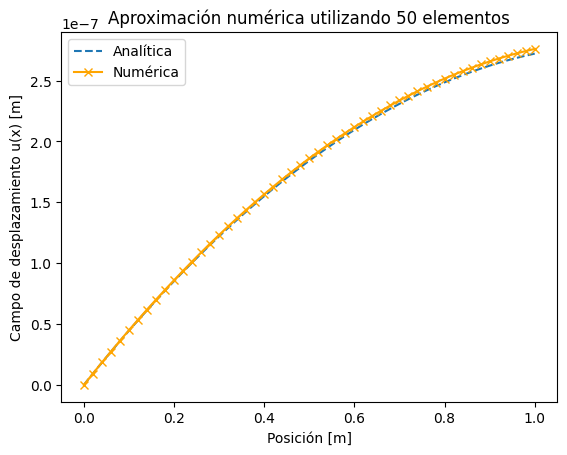

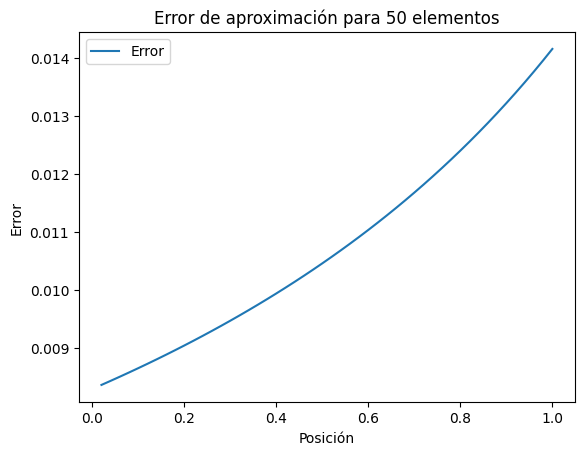

In [54]:
# Comparación analítica vs numérica

e = 50 # Número de elementos
n = e+1 # Número de nodos
h = L / e

sol_analitycal_e = np.zeros(n)
sol_numerical = np.zeros(n)

x_n = np.linspace(0,L,n)

error = np.zeros(n)

sol_analitycal_e = u_analitycal(x_n)
sol_numerical[1:] = u_numerical(n)

for i in range(n):
  if i>0:
    error[i] = np.abs(sol_analitycal_e[i] - sol_numerical[i])/np.abs(sol_analitycal_e[i])

fig, ax = plt.subplots()
ax.plot(x_a, sol_analitycal, label ='Analítica', linestyle="--")
ax.plot(x_n, sol_numerical, label ='Numérica', marker='x', linestyle="-",color='orange')
ax.set_xlabel('Posición [m]')
ax.set_ylabel('Campo de desplazamiento u(x) [m]')
ax.set_title(f'Aproximación numérica utilizando {e} elementos')

ax.legend()

fig_2, error_plot = plt.subplots()
error_plot.plot(x_n[1:], error[1:], label ='Error')
error_plot.set_xlabel('Posición')
error_plot.set_ylabel('Error')
error_plot.legend()
error_plot.set_title(f'Error de aproximación para {e} elementos')

plt.show()

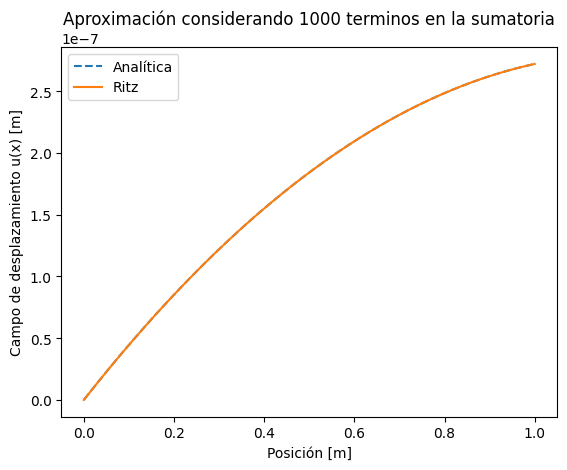

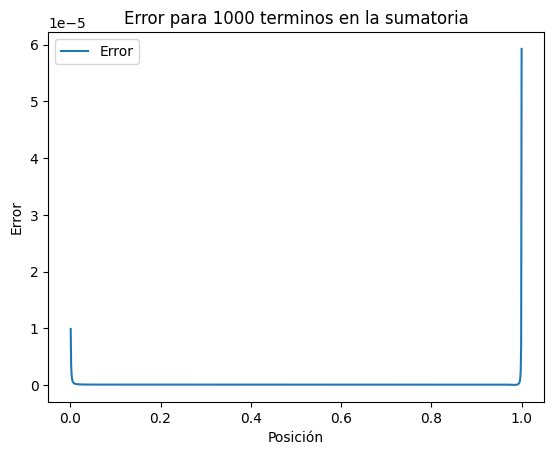

In [33]:
# Comparación analítica vs aproximación por funciones continuas

n = 1000 # Número de términos en la sumatoria
x = np.linspace(0,L,1000)

sol_ritz = np.zeros(len(x))

error = np.zeros(len(x))

sol_analitycal_e = u_analitycal(x)
sol_ritz = ritz(n, x)

error[1:] = np.abs(sol_analitycal_e[1:] - sol_ritz[1:])/np.abs(sol_analitycal_e[1:])

fig, ax = plt.subplots()
ax.plot(x_a, sol_analitycal, label ='Analítica',linestyle='--')
ax.plot(x, sol_ritz, label ='Ritz', linestyle="-")
ax.set_xlabel('Posición [m]')
ax.set_ylabel('Campo de desplazamiento u(x) [m]')
ax.set_title(f'Aproximación considerando {n} terminos en la sumatoria')
ax.legend()

fig_2, error_plot = plt.subplots()
error_plot.plot(x[1:], error[1:], label ='Error')
error_plot.set_xlabel('Posición')
error_plot.set_ylabel('Error')
error_plot.set_title(f'Error para {n} terminos en la sumatoria')
error_plot.legend()

plt.show()